# proj3: primary


In [1]:
# importing libraries

# import numerical libraries
import numpy as np   

# import preprocessing imputer (to replace missing values)
from sklearn.preprocessing import Imputer

# to handle data in form of rows and columns 
import pandas as pd    

# import ploting libraries
import matplotlib.pyplot as plt   

# draw the charts here as part of the notebook 
%matplotlib inline

# import for statistical plots
import seaborn as sns

import math 

## Loading new clean data

We will have two datasets:

    one called dfFull with all the full names of the values
    
    the other called df with all the encoded values

In [2]:
# data csv file contained in the same folder as the project
datafnFull = 'companiesProcessed.csv'

dfFull = pd.read_csv(datafnFull, na_values = ['?'], header = None)

# check first five rows of the dataset
dfFull.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age
1,0.0,48 Factoring Inc.,2014,Philadelphia,PA,125,Private,Finance & Investment,1,0,0,0,0,0,NaN,1.0,3
2,1.0,5PSolutions,2007,Fairfax,VA,5,Private,Data/Technology,1,1,1,0,0,0,NaN,1.0,10
3,2.0,Accela,1999,San Ramon,CA,750,Private,Governance,0,1,0,0,0,0,NaN,80.0,18
4,3.0,Accenture,1989,Chicago,IL,10001,Public,Research & Consulting,1,0,0,0,0,0,NaN,39600.0,28


In [3]:
# setting the elements in the first row as column names
dfFull.columns = dfFull.iloc[0]

# dropping the first row since now we have the correct column names
dfFull.drop(axis = 0, index = 0, inplace = True)

# Use reset_index()
dfFull.reset_index(drop = True, inplace = True)
dfFull.drop(columns = np.nan, inplace = True)
dfFull.head()

,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age
0,48 Factoring Inc.,2014,Philadelphia,PA,125,Private,Finance & Investment,1,0,0,0,0,0,NaN,1.0,3
1,5PSolutions,2007,Fairfax,VA,5,Private,Data/Technology,1,1,1,0,0,0,NaN,1.0,10
2,Accela,1999,San Ramon,CA,750,Private,Governance,0,1,0,0,0,0,NaN,80.0,18
3,Accenture,1989,Chicago,IL,10001,Public,Research & Consulting,1,0,0,0,0,0,NaN,39600.0,28
4,AccuWeather,1962,State College,PA,350,Private,Environment & Weather,1,1,1,0,0,0,NaN,59.0,55


In [4]:
# data csv file contained in the same folder as the project
datafnEnc = 'companiesProcessedEncoded.csv'

# df encoded for dataset with all numerical values instead of categorical
df = pd.read_csv(datafnEnc, na_values = ['?'], header = None)

# check first five rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age
1,0.0,48 Factoring Inc.,2014,Philadelphia,26,125,2,6,1,0,0,0,0,0,NaN,1.0,3
2,1.0,5PSolutions,2007,Fairfax,31,5,2,2,1,1,1,0,0,0,NaN,1.0,10
3,2.0,Accela,1999,San Ramon,3,750,2,9,0,1,0,0,0,0,NaN,80.0,18
4,3.0,Accenture,1989,Chicago,9,10001,3,15,1,0,0,0,0,0,NaN,39600.0,28


In [5]:
# setting the elements in the first row as column names
df.columns = df.iloc[0]

# dropping the first row since now we have the correct column names
df.drop(axis = 0, index = 0, inplace = True)

# Use reset_index()
df.reset_index(drop = True, inplace = True)

df.drop(columns = np.nan, inplace = True)
df.head()

,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age
0,48 Factoring Inc.,2014,Philadelphia,26,125,2,6,1,0,0,0,0,0,NaN,1.0,3
1,5PSolutions,2007,Fairfax,31,5,2,2,1,1,1,0,0,0,NaN,1.0,10
2,Accela,1999,San Ramon,3,750,2,9,0,1,0,0,0,0,NaN,80.0,18
3,Accenture,1989,Chicago,9,10001,3,15,1,0,0,0,0,0,NaN,39600.0,28
4,AccuWeather,1962,State College,26,350,2,5,1,1,1,0,0,0,NaN,59.0,55


### Converting values to numerical when appropriate

All values became object types when exported from preprocessing file

In [6]:
intCols = ['year_founded','state','size','company_type',
           'company_category','b2b','b2c','b2g','b2n',
           'academia','nonprofit','age']
floatCols = ['money_raised', 'revenue']

In [7]:
# converting columns into int types
for col in intCols:
    df[col] = df[col].astype(int)
for col in floatCols:
    df[col] = df[col].astype(float)


In [8]:

df['revenue'] = df['revenue'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 16 columns):
company_name        403 non-null object
year_founded        403 non-null int32
city                403 non-null object
state               403 non-null int32
size                403 non-null int32
company_type        403 non-null int32
company_category    403 non-null int32
b2b                 403 non-null int32
b2c                 403 non-null int32
b2g                 403 non-null int32
b2n                 403 non-null int32
academia            403 non-null int32
nonprofit           403 non-null int32
money_raised        133 non-null float64
revenue             403 non-null int32
age                 403 non-null int32
dtypes: float64(1), int32(13), object(2)
memory usage: 30.0+ KB


_____________________

## The question we are trying to answer is: What determines a company to be successful?

### The important features are: 
    revenue, size, type, category, business model
    
    The target column will be the ratio between revenue and size to determine if a company is successful or not.
    
    
### Since we are dealing with a lot of categorical data the algorithms we will try to run are:
    Linear regression to see if there is correlation between revenue and size
    
    We will try different classification models such as Naive Bayes Classification, Support Vector Machines, Decision Trees

In [9]:
df

,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age
0,48 Factoring Inc.,2014,Philadelphia,26,125,2,6,1,0,0,0,0,0,NaN,1,3
1,5PSolutions,2007,Fairfax,31,5,2,2,1,1,1,0,0,0,NaN,1,10
2,Accela,1999,San Ramon,3,750,2,9,0,1,0,0,0,0,NaN,80,18
3,Accenture,1989,Chicago,9,10001,3,15,1,0,0,0,0,0,NaN,39600,28
4,AccuWeather,1962,State College,26,350,2,5,1,1,1,0,0,0,NaN,59,55
5,Acxiom,1969,Little Rock,1,7500,3,2,1,0,0,0,0,0,NaN,918,48
6,Aidin,2011,New York,22,5,2,10,1,1,0,0,0,0,0.62,1,6
7,Alarm.com,2000,Leesburg Pike Vienna,31,350,2,13,0,1,0,0,0,0,163.00,339,17
8,Allianz,1896,New York,22,10001,3,6,0,1,0,0,0,0,NaN,151400,121
9,Allied Van Lines,1928,Oakbrook Terrace,9,7500,2,17,1,1,1,0,0,0,NaN,10,89


## We are finding the ratio between revenue and size to get revenue per employee.

We need to multiply the revenue by 1000 because the classification model might need integers instead of float.

## Employee value (thousands of dollars)

In [10]:

# df['empl_val'] = 
ratio = (df['revenue']/df['size'])
df['empl_val'] = (ratio * 1000).apply(np.ceil).astype(int)


In [11]:
df.head()


,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age,empl_val
0,48 Factoring Inc.,2014,Philadelphia,26,125,2,6,1,0,0,0,0,0,NaN,1,3,8
1,5PSolutions,2007,Fairfax,31,5,2,2,1,1,1,0,0,0,NaN,1,10,200
2,Accela,1999,San Ramon,3,750,2,9,0,1,0,0,0,0,NaN,80,18,107
3,Accenture,1989,Chicago,9,10001,3,15,1,0,0,0,0,0,NaN,39600,28,3960
4,AccuWeather,1962,State College,26,350,2,5,1,1,1,0,0,0,NaN,59,55,169


## Linear Regression

In [12]:
# import LinearRegrssion 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

def companiesSLR(name1, name2):
    '''  
    name1: independent variable
    name2: dependent variable
    
    builds a simple linear regression model
    and displays the R2 score and the line equation
    '''
    X1 = df[[name1]]
    Y  = df[name2]

    # training/fitting 
    lm.fit(X1, Y)
    r2 = lm.score(X1, Y)
    b0 = lm.intercept_
    b1 = lm.coef_
    
    print('R^2 = ', r2)
    
    print('b0 = intercept = ', b0)
    print('b1 = coef = ', b1)

    # display line equation
    print(name2, '=', b0, '+', b1[0], '*', name1)
    
    # display regression plot and residual plot side by side
    fig = plt.figure(figsize=(16, 8))
    fig.add_subplot(1,2,1)
    sns.regplot(df[name1], df[name2])
    plt.title('Regression Plot')
    
    fig.add_subplot(1,2,2)
    sns.residplot(df[name1], df[name2])
    plt.title('Residual Plot')

R^2 =  0.023380137005746815
b0 = intercept =  1926.0785961734464
b1 = coef =  [0.63950776]
revenue = 1926.0785961734464 + 0.639507761595102 * size


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


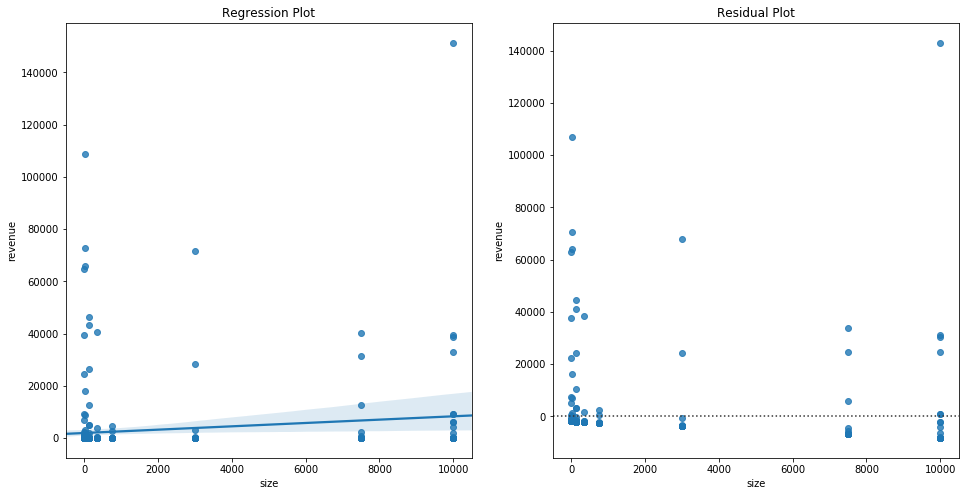

In [13]:
companiesSLR('size', 'revenue')

R^2 =  0.005823992415807222
b0 = intercept =  -926.6347889729204
b1 = coef =  [1800.2431894]
revenue = -926.6347889729204 + 1800.2431893957876 * company_type


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


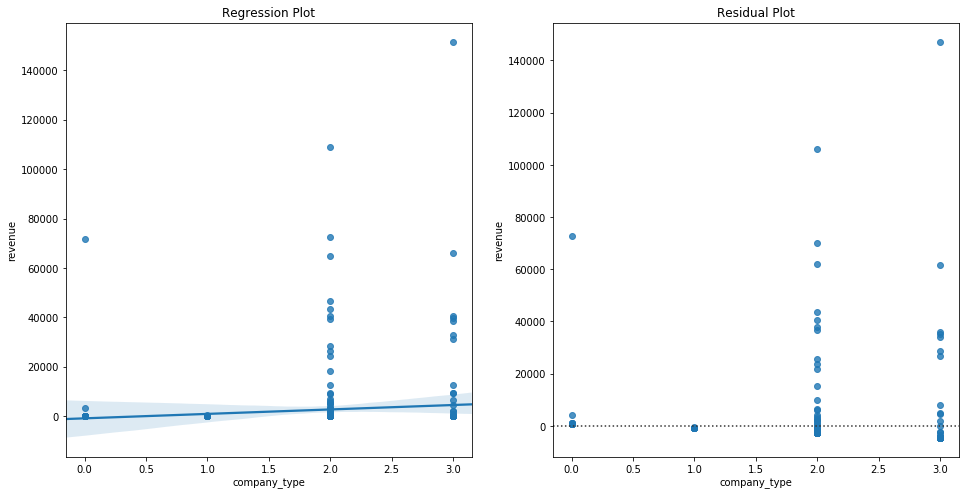

In [14]:
companiesSLR('company_type', 'revenue')

R^2 =  0.00028144153499809477
b0 = intercept =  2476.042531567491
b1 = coef =  [44.27487573]
revenue = 2476.042531567491 + 44.274875732664526 * company_category


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


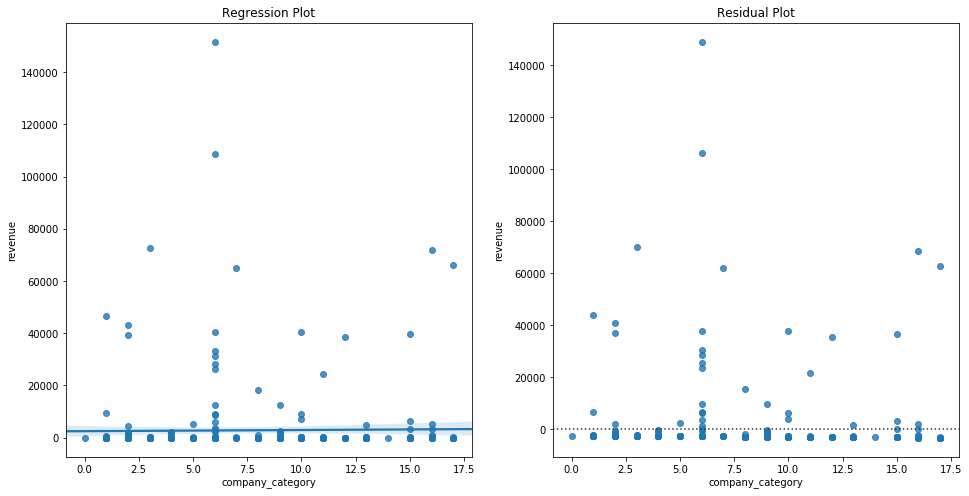

In [15]:
companiesSLR('company_category', 'revenue')

R^2 =  0.0008428597233184343
b0 = intercept =  3342.641492548455
b1 = coef =  [-37.08793526]
revenue = 3342.641492548455 + -37.08793525677512 * state


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


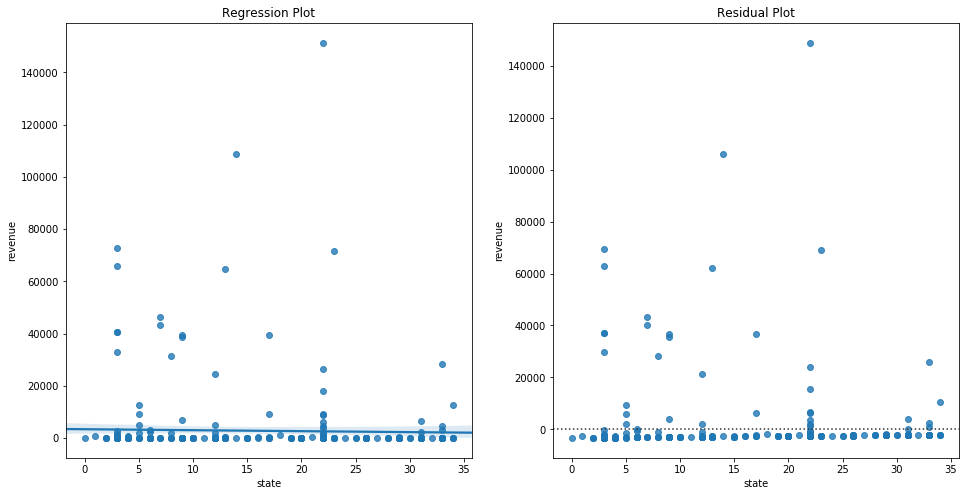

In [16]:
companiesSLR('state', 'revenue')

R^2 =  0.026048199481056744
b0 = intercept =  135840.6749168251
b1 = coef =  [-66.71273338]
revenue = 135840.6749168251 + -66.712733383951 * year_founded


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


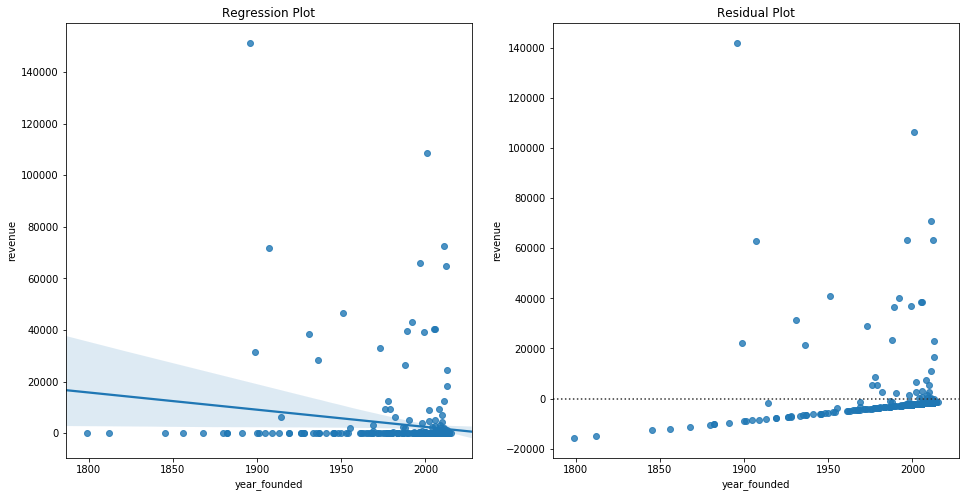

In [17]:
companiesSLR('year_founded', 'revenue')

R^2 =  0.00034703777964584237
b0 = intercept =  1279.152658865489
b1 = coef =  [11.75518152]
size = 1279.152658865489 + 11.755181516572964 * company_category


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


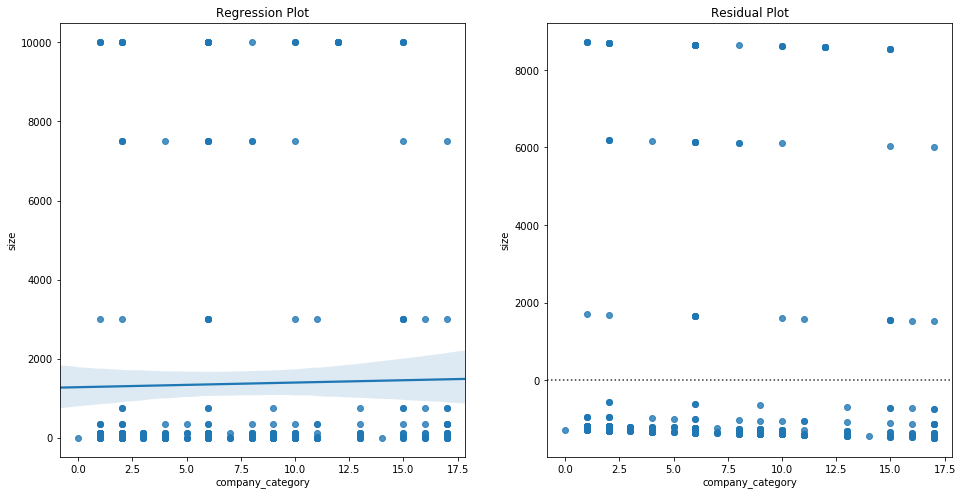

In [18]:
companiesSLR('company_category', 'size')

R^2 =  0.168827026885762
b0 = intercept =  -3431.133447182241
b1 = coef =  [2317.49853623]
size = -3431.133447182241 + 2317.498536228349 * company_type


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


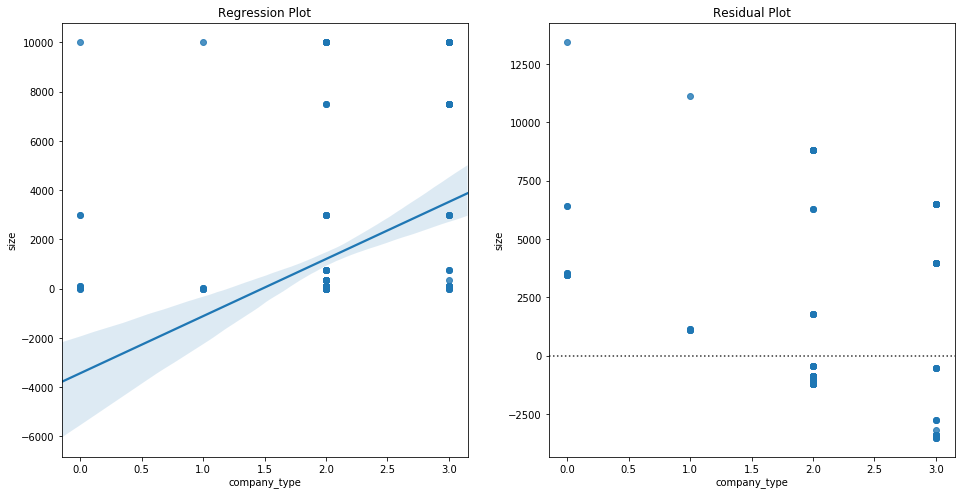

In [19]:
companiesSLR('company_type', 'size')

R^2 =  0.0013820840813584256
b0 = intercept =  58437.274809160335
b1 = coef =  [66154.79872025]
empl_val = 58437.274809160335 + 66154.79872025142 * b2b


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


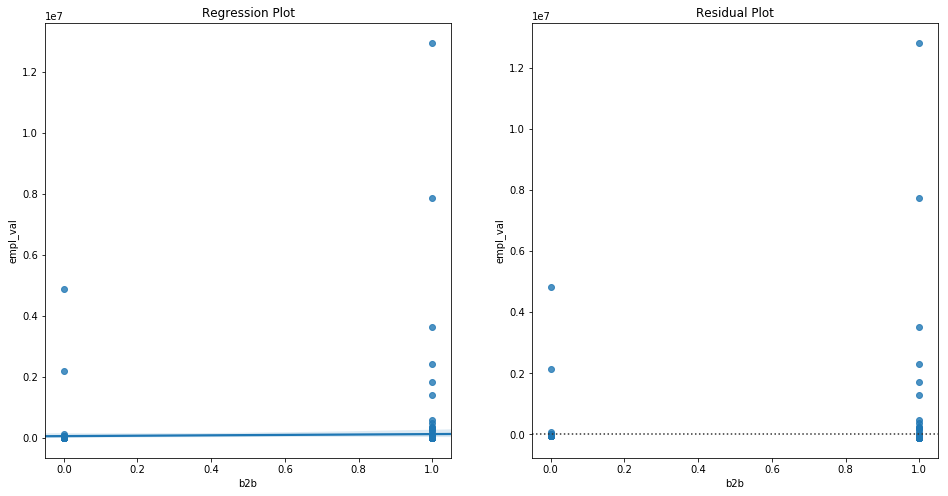

In [20]:
companiesSLR('b2b', 'empl_val')

R^2 =  2.771384429489654e-05
b0 = intercept =  119588.04318126373
b1 = coef =  [-7973.20671709]
empl_val = 119588.04318126373 + -7973.206717085467 * company_type


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


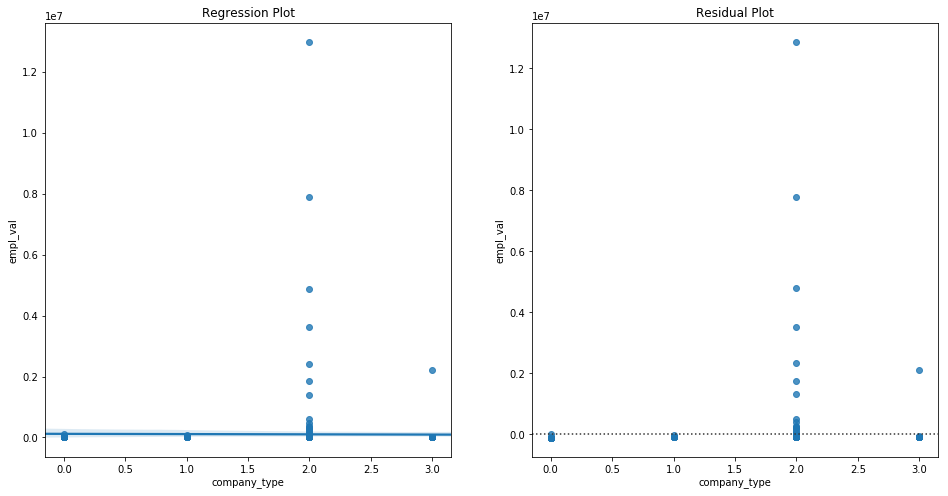

In [21]:
companiesSLR('company_type', 'empl_val')

R^2 =  0.3423330553973345
b0 = intercept =  49.23525165439719
b1 = coef =  [57.82584727]
size = 49.23525165439719 + 57.825847266144386 * age


C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


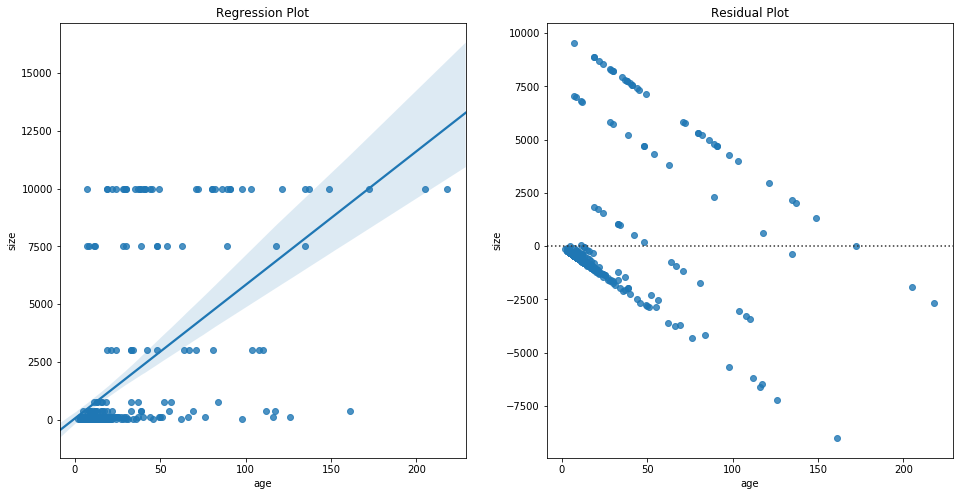

In [22]:
companiesSLR('age', 'size')

In [23]:
df.columns

Index(['company_name', 'year_founded', 'city', 'state', 'size', 'company_type',
       'company_category', 'b2b', 'b2c', 'b2g', 'b2n', 'academia', 'nonprofit',
       'money_raised', 'revenue', 'age', 'empl_val'],
      dtype='object', name=0)

## List of columns with not so horrible correlation

age and size: R^2 = 0.34


In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [25]:
X1 = df[['size']]
Y = df['revenue']

### Splitting the data into 70% training and 30% testing

In [53]:
# drop city columns because they are strings and there are too many of them
X = df.drop(columns = ['city', 'company_name', 'money_raised', 'empl_val'])
target = df[['empl_val']]
X.head()

,year_founded,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,revenue,age
0,2014,26,125,2,6,1,0,0,0,0,0,1,3
1,2007,31,5,2,2,1,1,1,0,0,0,1,10
2,1999,3,750,2,9,0,1,0,0,0,0,80,18
3,1989,9,10001,3,15,1,0,0,0,0,0,39600,28
4,1962,26,350,2,5,1,1,1,0,0,0,59,55


In [54]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, target, test_size = .30)

In [55]:
Xtrain.shape

(282, 13)

In [56]:
Ytrain.shape


(282, 1)

### Linear regression after splitting data

### With Cross Validation


In [57]:
# Checking cross validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

clf = LinearRegression()

scores = cross_val_score(clf, X, target, cv=5)
print(scores)


lrm = LinearRegression()
lrm.fit(Xtrain, Ytrain)
Yhat = lrm.predict(Xtest)

mse = mean_squared_error(Ytest, Yhat)
print('training score is', lrm.score(Xtrain, Ytrain))

print('testing score is ', lrm.score(Xtest,Ytest))

print('MSE is ', mse)

# lrm.score(Ytest, Yhat)
# How can we get the code to see difference between Yhat and Ytest

[-2.39644183e+02 -4.89877121e-01  3.65080916e-01  1.59956138e-01
 -8.35477859e+01]
training score is 0.32794106147060764
testing score is  0.08707045493477483
MSE is  1963100666726.6462


### It seems that regression is not the way to go.

# Let's try classification.

## Naive Bayesian Classification

### Splitting the data into 70% training and 30% testing


In [33]:
dfFull.head(2)

,company_name,year_founded,city,state,size,company_type,company_category,b2b,b2c,b2g,b2n,academia,nonprofit,money_raised,revenue,age
0,48 Factoring Inc.,2014,Philadelphia,PA,125,Private,Finance & Investment,1,0,0,0,0,0,NaN,1.0,3
1,5PSolutions,2007,Fairfax,VA,5,Private,Data/Technology,1,1,1,0,0,0,NaN,1.0,10


In [34]:
X = df.drop(columns = ['city', 'company_name', 'money_raised', 'empl_val'])
ytarget = df['empl_val']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, ytarget, test_size = .30)



In [35]:
X.columns

Index(['year_founded', 'state', 'size', 'company_type', 'company_category',
       'b2b', 'b2c', 'b2g', 'b2n', 'academia', 'nonprofit', 'revenue', 'age'],
      dtype='object', name=0)

In [36]:
# based on the factors given it is predicting with that accuracy the business model

In [37]:
## now we select the model class and initialize the model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(Xtrain, Ytrain)
yhat = model.predict(Xtest)
accuracy_score(Ytest, yhat)

0.1487603305785124

### Naive Bayes Classification does not work well with out data.

### We'll try Support Vector Machines

In [63]:
X = df.drop(columns = ['city', 'company_name', 'money_raised', 'empl_val'])
ytarget = df['empl_val']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, ytarget, test_size = .30)


In [64]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 76 to 151
Data columns (total 13 columns):
year_founded        241 non-null int32
state               241 non-null int32
size                241 non-null int32
company_type        241 non-null int32
company_category    241 non-null int32
b2b                 241 non-null int32
b2c                 241 non-null int32
b2g                 241 non-null int32
b2n                 241 non-null int32
academia            241 non-null int32
nonprofit           241 non-null int32
revenue             241 non-null int32
age                 241 non-null int32
dtypes: int32(13)
memory usage: 14.1 KB


In [65]:
Ytrain.dtype

dtype('int32')

In [66]:
# Grid search to check for different parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# params = [{'kernel':['linear','poly','sigmoid', 'rbf'], 'C':['0.01', '1', '30', '100', '1E5', '1E10']}]
params = [{'kernel':['linear','poly','sigmoid', 'rbf'], 'C':[0.001, 0.01, 1, 30, 1E6, 1E10]}]

svm = SVC()
# cv 
grid = GridSearchCV(svm, params )
grid.fit(Xtrain, Ytrain)

print(grid.best_params_)
print(grid.best_estimator_)

scores = grid.cv_results_
scores['mean_test_score']

for p, r2_train, r2_test in zip(scores['params'], scores['mean_train_score'], scores['mean_test_score']):
    print(p, "R^2 on train data:", r2_train, "R^2 on test data:", r2_test)

C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


{'C': 1, 'kernel': 'linear'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
{'C': 0.001, 'kernel': 'linear'} R^2 on train data: 0.4206700866357847 R^2 on test data: 0.16182572614107885
{'C': 0.001, 'kernel': 'poly'} R^2 on train data: 1.0 R^2 on test data: 0.2697095435684647
{'C': 0.001, 'kernel': 'sigmoid'} R^2 on train data: 0.06335779688958627 R^2 on test data: 0.05394190871369295
{'C': 0.001, 'kernel': 'rbf'} R^2 on train data: 0.07966214471567323 R^2 on test data: 0.06639004149377593
{'C': 0.01, 'kernel': 'linear'} R^2 on train data: 0.6586343553516375 R^2 on test data: 0.17842323651452283
{'C': 0.01, 'kernel': 'poly'} R^2 on train data: 1.0 R^2 on test data: 0.2697095435684647
{'C': 0.01, 'kernel': 'sigmoid'} R^2 on train data: 0.06335779688958627 R^2 on test data: 0.05394190871369295
{'C': 0.01, 'kernel

C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [67]:
# Using the best score found previously kernel = linear, C = 1
svm = SVC(kernel='linear', C = 1)
svm.fit(Xtrain, Ytrain)
yhat = svm.predict(Xtest)
accuracy_score(Ytest, yhat)

0.30246913580246915

In [68]:
# SVM with Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel = 'linear', C = 1)
scores = cross_val_score(clf, X, target, cv = 5)
scores 

C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mateus Maccieri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expe

array([0.21428571, 0.50666667, 0.52830189, 0.68181818, 0.71428571])

## Support Vector Machine does not work well with our data either.

## We will give kmeans clustering a shot

In [44]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

kmeans = KMeans()
params = {'n_clusters':[4,10,50,100,250, 268]}
grid = GridSearchCV(kmeans, params )
grid.fit(X)

print(grid.best_params_)

print(grid.best_estimator_)

{'n_clusters': 268}
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=268, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [45]:
# Using best parameter found previusly
kmeans = KMeans(n_clusters = 268)
kmeans.fit(X)
Y_means = kmeans.predict(X)
accuracy_score(ytarget, Y_means)

0.0024813895781637717

### Clustering was not good for our data. Our data does not contain any significant clusters

## Unfortunately, none of all the different models we ran work well with our data.

## The highest accuracy obtained was with Support Vector Machine with a score of 33.06%
